In [2]:
import random
import math
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import numpy as np
from scipy.optimize import differential_evolution

# Define the Fitness and Individual types for DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


--- rastrigin | 2 Dimensions ---
GA: Best = 0.0, Worst = 0.013879918253815404, Avg = 0.0019, Std = 0.0044
PSO: Best = 0.0, Worst = 0.0, Avg = 0.0000, Std = 0.0000


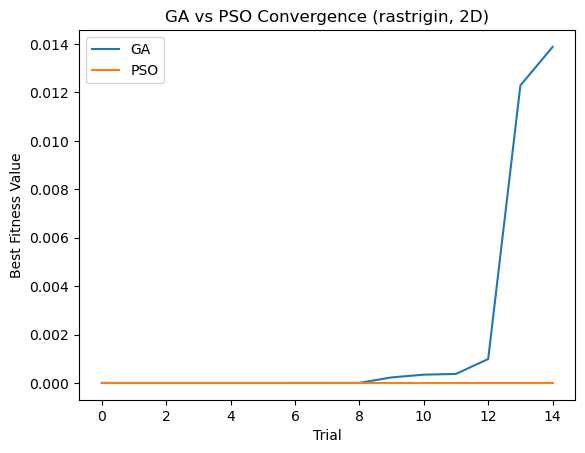


--- rosenbrock | 2 Dimensions ---
GA: Best = 1.8927281854160172e-06, Worst = 0.7929770697392704, Avg = 0.1108, Std = 0.1992
PSO: Best = 0.0, Worst = 0.0, Avg = 0.0000, Std = 0.0000


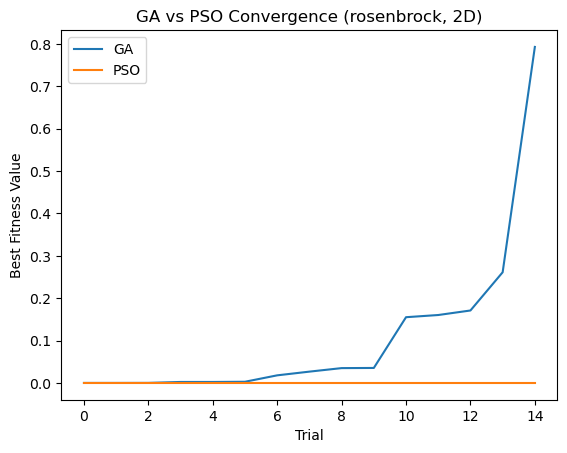


--- rastrigin | 15 Dimensions ---
GA: Best = 17.39322317915773, Worst = 52.3876921885269, Avg = 31.6188, Std = 9.4441
PSO: Best = 4.9747952854665485, Worst = 14.924375780761304, Avg = 9.9496, Std = 3.1880


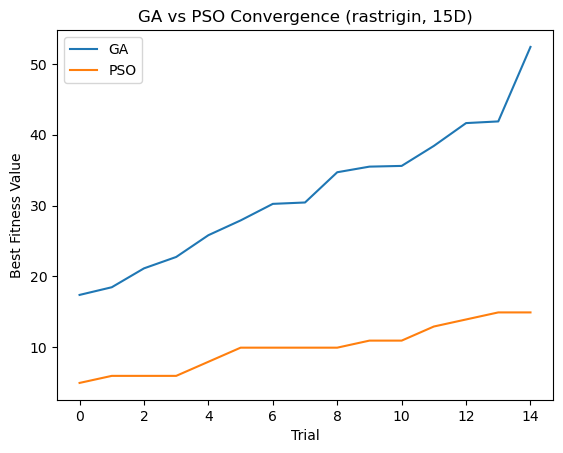


--- rosenbrock | 15 Dimensions ---
GA: Best = 24.277375482182634, Worst = 181.5734412960666, Avg = 92.6084, Std = 44.3070
PSO: Best = 3.392405716819442e-13, Worst = 3.986625540536928, Avg = 1.0631, Std = 1.7630


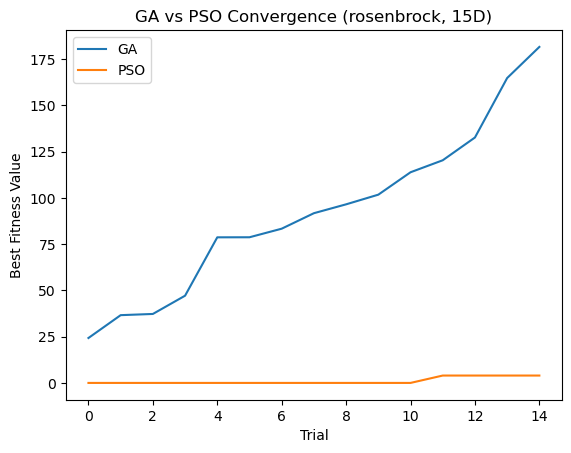

In [3]:
# Benchmark Functions
def rastrigin(individual):
    return sum(x**2 - 10 * math.cos(2 * math.pi * x) + 10 for x in individual),

def rosenbrock(individual):
    return sum(100.0*(individual[i+1]-individual[i]**2)**2 + (1-individual[i])**2 for i in range(len(individual)-1)),

# GA Setup
def setup_toolbox(dim, function):
    toolbox = base.Toolbox()
    toolbox.register("attribute", random.uniform, -5.12, 5.12)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", function)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    return toolbox

def genetic_algorithm(dim, function, generations=100, population_size=50):
    toolbox = setup_toolbox(dim, function)
    population = toolbox.population(n=population_size)

    # Evaluate population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Run GA
    algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=population_size,
                              cxpb=0.7, mutpb=0.2, ngen=generations, verbose=False)
    return tools.selBest(population, k=1)[0].fitness.values[0]

# PSO Implementation
def pso(dim, function, num_trials=15):
    bounds = [(-5.12, 5.12)] * dim
    results = []
    for _ in range(num_trials):
        result = differential_evolution(lambda x: function(x)[0], bounds, strategy='best1bin', tol=1e-6)
        results.append(result.fun)
    return results

# Run trials and compare
def run_comparison(dimensions, benchmark_functions, num_trials=15):
    for dim in dimensions:
        for function in benchmark_functions:
            print(f"\n--- {function.__name__} | {dim} Dimensions ---")
            
            # GA Results
            ga_results = [genetic_algorithm(dim, function) for _ in range(num_trials)]
            print(f"GA: Best = {min(ga_results)}, Worst = {max(ga_results)}, Avg = {np.mean(ga_results):.4f}, Std = {np.std(ga_results):.4f}")

            # PSO Results
            pso_results = pso(dim, function, num_trials)
            print(f"PSO: Best = {min(pso_results)}, Worst = {max(pso_results)}, Avg = {np.mean(pso_results):.4f}, Std = {np.std(pso_results):.4f}")
            
            # Convergence Plot
            plt.plot(sorted(ga_results), label="GA")
            plt.plot(sorted(pso_results), label="PSO")
            plt.xlabel('Trial')
            plt.ylabel('Best Fitness Value')
            plt.title(f'GA vs PSO Convergence ({function.__name__}, {dim}D)')
            plt.legend()
            plt.show()

# Main Execution
if __name__ == "__main__":
    # Define benchmark functions and dimensions
    dimensions = [2, 15]
    benchmark_functions = [rastrigin, rosenbrock]
    num_trials = 15

    run_comparison(dimensions, benchmark_functions, num_trials)

